<a href="https://colab.research.google.com/github/Andradeus/Andradeus/blob/main/An%C3%A1lise_T%C3%A9cnica_de_A%C3%A7%C3%B5es_(MGLU3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [5]:
itub4 = pd.read_csv('itub4.csv', index_col = 0)
mglu3 = pd.read_csv('mglu3.csv', index_col = 0)
petr3 = pd.read_csv('petr3.csv', index_col = 0)
viia3 = pd.read_csv('viia3.csv', index_col = 0)

In [6]:
d = {       'itub4':itub4['Close'],
             'mglu3':mglu3['Close'], 
             'petr3':petr3['Close'],
             'viia3':viia3['Close']}

dados = pd.DataFrame(data=d)
dados.index = pd.DatetimeIndex(dados.index)

In [ ]:
dados.head()

,itub4,mglu3,petr3,viia3
Date,,,,
2015-01-02,18.639118,0.232812,9.00,6.80
2015-01-05,18.732782,0.237187,8.27,6.80
2015-01-06,19.035812,0.234062,8.06,6.80
2015-01-07,19.724518,0.241875,8.45,7.36
2015-01-08,20.033056,0.240000,9.02,7.36


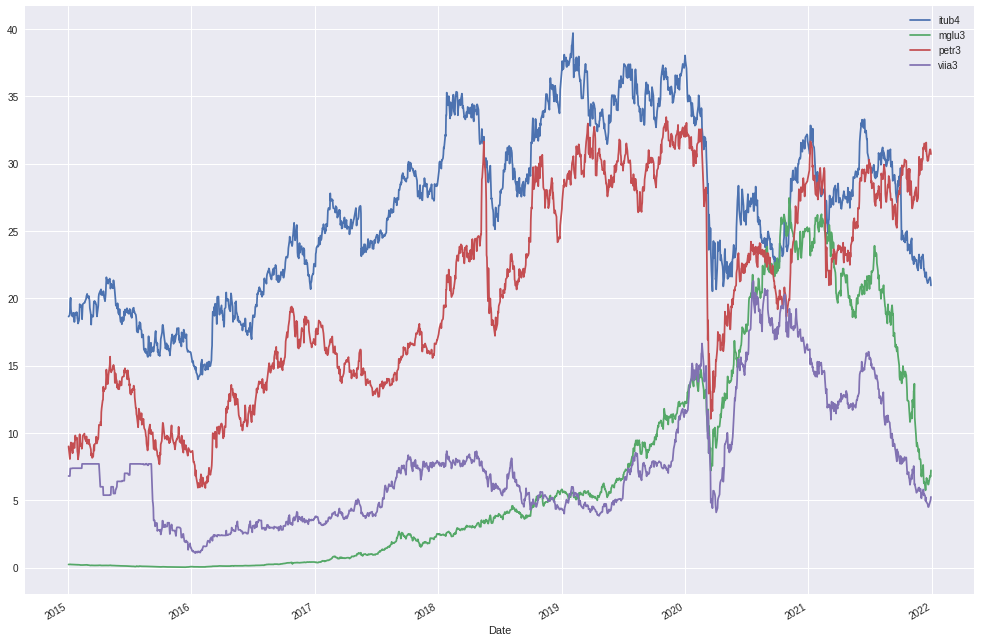

In [ ]:
dados.plot(figsize = (17,12))

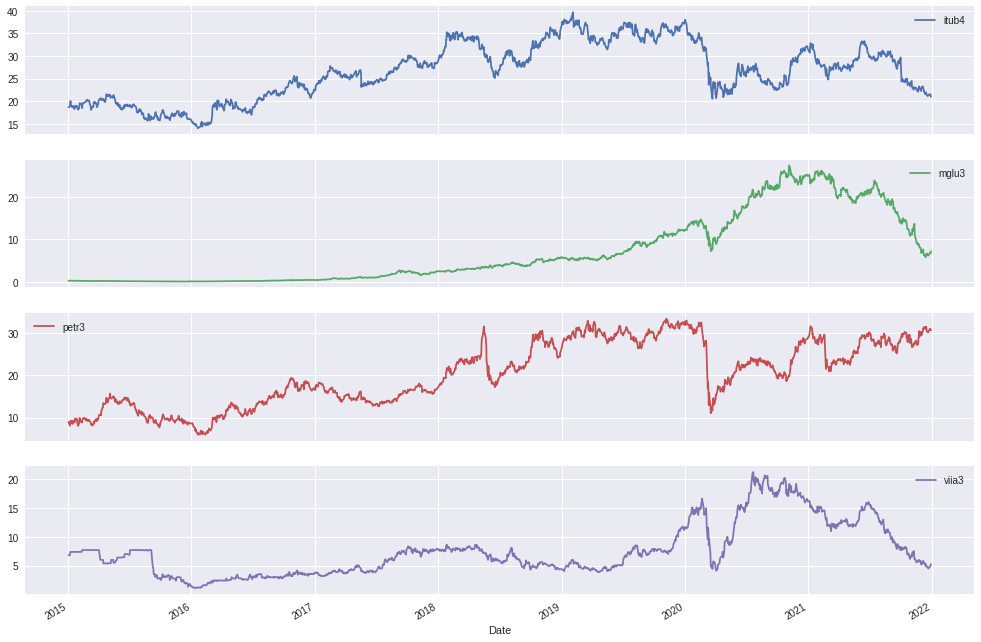

In [ ]:
dados.plot(figsize = (17,12), subplots = True);

In [8]:
#MGLU3

mglu = pd.DataFrame(mglu3['Close'])

mglu.index = pd.DatetimeIndex(mglu.index)

janela = 30

In [9]:
# Mímino
mglu['min'] = mglu['Close'].rolling(window = janela).min()

# Média
mglu['media'] = mglu['Close'].rolling(window = janela).mean()

# Desvio Padrão
mglu['dp'] = mglu['Close'].rolling(window = janela).std()

# Mediana
mglu['mediana'] = mglu['Close'].rolling(window = janela).median()

# Máximo
mglu['maximo'] = mglu['Close'].rolling(window = janela).max()

In [ ]:
mglu

,Close,min,media,dp,mediana,maximo
Date,,,,,,
2015-01-02,0.232812,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.237187,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.234062,NaN,NaN,NaN,NaN,NaN
2015-01-07,0.241875,NaN,NaN,NaN,NaN,NaN
2015-01-08,0.240000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-23,6.200000,5.74,7.737667,1.753548,7.175,13.65
2021-12-27,6.780000,5.74,7.508667,1.359020,6.965,11.15
2021-12-28,6.830000,5.74,7.364667,1.176499,6.855,9.74


In [10]:
# Média Móvel de Curto Prazo
# 30 dias
mglu['MMScp'] =  mglu['Close'].rolling(window = 30).mean()

# Média Móvel de Longo Prazo
# 252 dias 
mglu['MMSlp'] = mglu['Close'].rolling(window = 252).mean()

In [11]:
mglu.dropna(inplace = True)

In [19]:
mglu

,Close,min,media,dp,mediana,maximo,MMScp,MMSlp,Posição,Retorno,Estratégia
Date,,,,,,,,,,,
2016-01-11,0.056328,0.030585,0.044360,0.014112,0.039687,0.07082,0.044360,0.115646,-1,NaN,NaN
2016-01-12,0.053125,0.030585,0.044800,0.014175,0.040234,0.07082,0.044800,0.114933,-1,-0.058544,0.058544
2016-01-13,0.052773,0.030585,0.045183,0.014232,0.040234,0.07082,0.045183,0.114201,-1,-0.006648,0.006648
2016-01-14,0.055429,0.030585,0.045729,0.014302,0.041210,0.07082,0.045729,0.113492,-1,0.049103,-0.049103
2016-01-15,0.056250,0.030585,0.046454,0.014265,0.041953,0.07082,0.046454,0.112756,-1,0.014703,-0.014703
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,6.200000,5.740000,7.737667,1.753548,7.175000,13.65000,7.737667,18.963413,-1,0.006473,-0.006473
2021-12-27,6.780000,5.740000,7.508667,1.359020,6.965000,11.15000,7.508667,18.891270,-1,0.089428,-0.089428
2021-12-28,6.830000,5.740000,7.364667,1.176499,6.855000,9.74000,7.364667,18.820992,-1,0.007348,-0.007348


In [12]:
# Avaliação de Posição
mglu['Posição'] = np.where(mglu['MMScp'] > mglu['MMSlp'], 1, -1)

In [18]:
mglu

,Close,min,media,dp,mediana,maximo,MMScp,MMSlp,Posição,Retorno,Estratégia
Date,,,,,,,,,,,
2016-01-11,0.056328,0.030585,0.044360,0.014112,0.039687,0.07082,0.044360,0.115646,-1,NaN,NaN
2016-01-12,0.053125,0.030585,0.044800,0.014175,0.040234,0.07082,0.044800,0.114933,-1,-0.058544,0.058544
2016-01-13,0.052773,0.030585,0.045183,0.014232,0.040234,0.07082,0.045183,0.114201,-1,-0.006648,0.006648
2016-01-14,0.055429,0.030585,0.045729,0.014302,0.041210,0.07082,0.045729,0.113492,-1,0.049103,-0.049103
2016-01-15,0.056250,0.030585,0.046454,0.014265,0.041953,0.07082,0.046454,0.112756,-1,0.014703,-0.014703
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,6.200000,5.740000,7.737667,1.753548,7.175000,13.65000,7.737667,18.963413,-1,0.006473,-0.006473
2021-12-27,6.780000,5.740000,7.508667,1.359020,6.965000,11.15000,7.508667,18.891270,-1,0.089428,-0.089428
2021-12-28,6.830000,5.740000,7.364667,1.176499,6.855000,9.74000,7.364667,18.820992,-1,0.007348,-0.007348


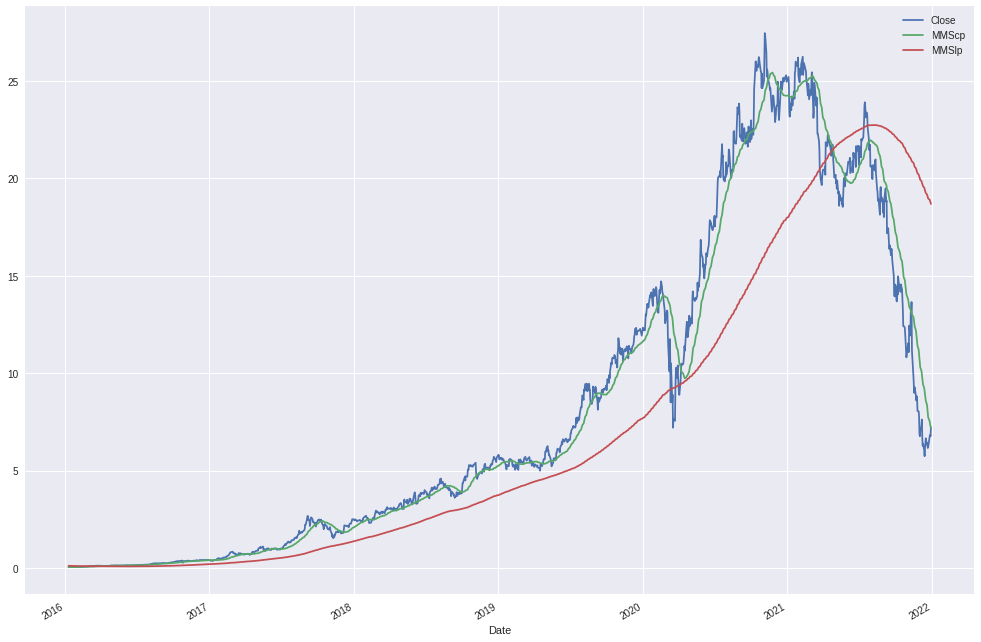

In [16]:
mglu[['Close', 'MMScp', 'MMSlp']].plot(figsize=(17,12));

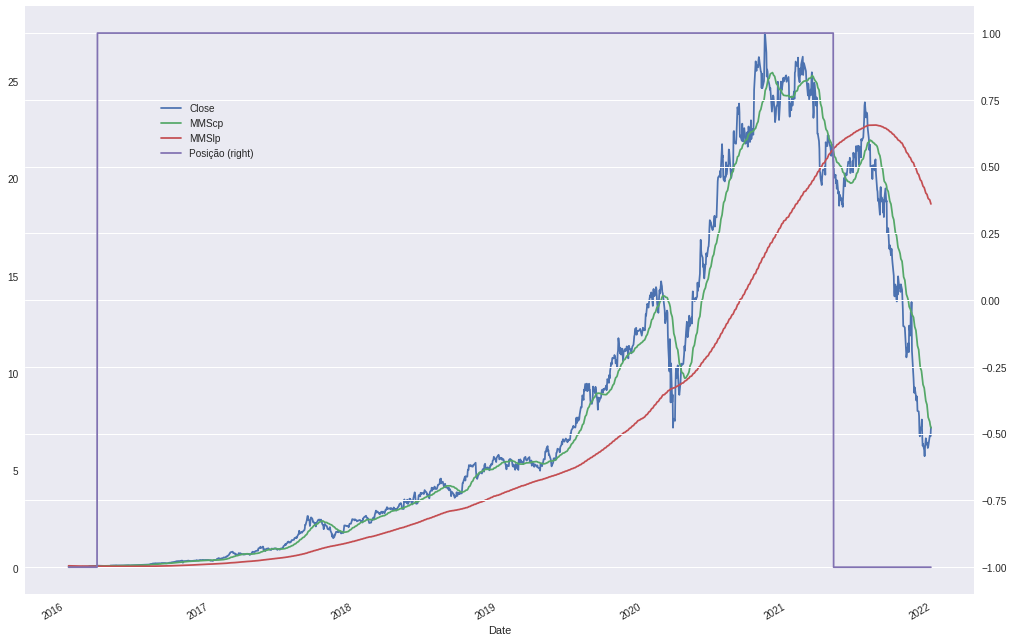

In [17]:
ax = mglu[['Close', 'MMScp', 'MMSlp', 'Posição']].plot(figsize = (17,12),
                                                           secondary_y='Posição');
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

In [13]:
mglu['Retorno'] = np.log(mglu['Close']).diff()
mglu['Estratégia'] = mglu['Posição'].shift(1) * mglu['Retorno']

In [14]:
mglu[['Retorno', 'Estratégia']].round(4)

,Retorno,Estratégia
Date,,
2016-01-11,NaN,NaN
2016-01-12,-0.0585,0.0585
2016-01-13,-0.0066,0.0066
2016-01-14,0.0491,-0.0491
2016-01-15,0.0147,-0.0147
...,...,...
2021-12-23,0.0065,-0.0065
2021-12-27,0.0894,-0.0894
2021-12-28,0.0073,-0.0073


In [21]:
# Log Retorno Acumulado
np.exp(mglu[['Retorno', 'Estratégia']].sum())

Retorno       128.177816
Estratégia    218.341621
dtype: float64

In [22]:
# Volatilidade Anual
mglu[['Retorno', 'Estratégia']].std() * 252 ** 0.5

Retorno       0.608495
Estratégia    0.607983
dtype: float64

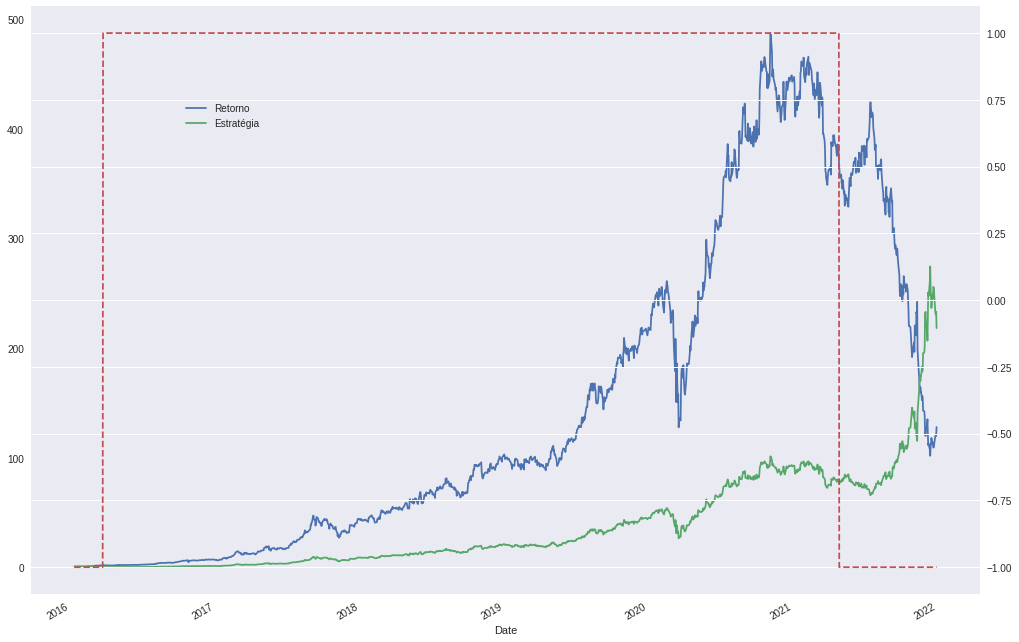

In [25]:
# Gráfico Retorno e Estratégia
ax = mglu[['Retorno', 'Estratégia']].cumsum().apply(np.exp).plot(figsize = (17,12))

mglu['Posição'].plot(ax = ax, secondary_y='Posição', style = '--')

ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [26]:
from itertools import product 

# De 20 até 60 dias
mms1 = range(20, 61, 4)
# De 180 até 280 dias
mms2 = range(180, 281, 10)

# salvar resultados em um DataFrame
resultados = pd.DataFrame()

# fazer a iteração 
for MMS1, MMS2 in product(mms1, mms2):
  dados = pd.DataFrame(mglu['Close'])
  dados.dropna(inplace = True)
  dados['Retorno'] = np.log(mglu['Close']).diff()
  dados['MMS1'] = mglu['Close'].rolling(MMS1).mean()
  dados['MMS2'] = mglu['Close'].rolling(MMS2).mean()
  dados.dropna(inplace = True)
  dados['Posição'] = np.where(dados['MMS1'] > dados['MMS2'], 1, -1)
  dados['Estratégia'] = dados['Posição'].shift(1) * dados['Retorno']
  dados.dropna(inplace = True)
  performance = np.exp(dados[['Retorno', 'Estratégia']].sum())
  resultados = resultados.append(pd.DataFrame(
      {'MMS1':MMS1, 'MMS2': MMS2,
      'BUY&HOLD': performance['Retorno'],
       'ESTRATÉGIA': performance['Estratégia'],
       'OUT': performance['Estratégia'] - performance['Retorno']},
        index = [0]), ignore_index = True)

In [27]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MMS1        121 non-null    int64  
 1   MMS2        121 non-null    int64  
 2   BUY&HOLD    121 non-null    float64
 3   ESTRATÉGIA  121 non-null    float64
 4   OUT         121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [30]:
resultados.sort_values('OUT', ascending=False).head(10)

,MMS1,MMS2,BUY&HOLD,ESTRATÉGIA,OUT
90,52,200,26.594569,240.900674,214.306105
101,56,200,26.594569,223.916790,197.322221
112,60,200,26.594569,217.549793,190.955224
110,60,180,24.876479,213.469218,188.592739
68,44,200,26.594569,211.626202,185.031633
79,48,200,26.594569,210.968864,184.374295
57,40,200,26.594569,191.850885,165.256316
111,60,190,20.452852,184.926475,164.473623
29,28,250,19.627512,177.464083,157.836570
80,48,210,19.490915,176.553884,157.062969
